<a href="https://colab.research.google.com/github/Ashishverma66/Machine-learning-Notebooks/blob/main/SVM_Implementation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cell_df=pd.read_csv("/content/cell_samples.csv")

In [ ]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
cell_df.shape

(699, 11)

In [ ]:
cell_df.size

7689

In [ ]:
cell_df.count()

,0
ID,699
Clump,699
UnifSize,699
UnifShape,699
MargAdh,699
SingEpiSize,699
BareNuc,699
BlandChrom,699
NormNucl,699
Mit,699


Distrubution of classes


In [ ]:
malignant_df=cell_df[cell_df['Class']==4][0:200]
benign_df=cell_df[cell_df['Class']==2][0:200]

<Axes: xlabel='Clump', ylabel='UnifSize'>

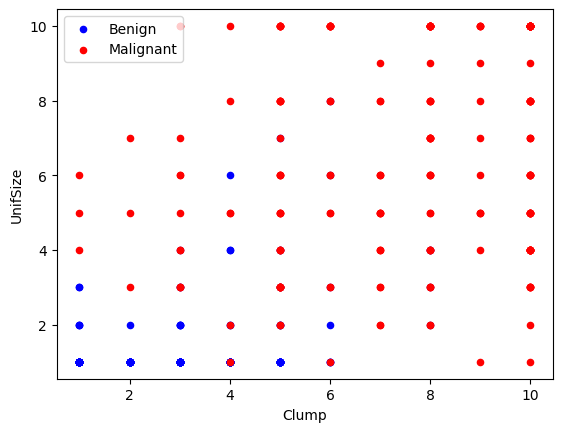

In [ ]:
axes=benign_df.plot(kind='scatter',x='Clump', y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump', y='UnifSize',color='red',label='Malignant', ax=axes)

Identifying Unwanted rows

In [ ]:
cell_df.dtypes

,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,object
BlandChrom,int64
NormNucl,int64
Mit,int64


In [ ]:
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]

In [ ]:
cell_df['BareNuc']=cell_df['BareNuc'].astype('int')
cell_df.dtypes


,0
ID,int64
Clump,int64
UnifSize,int64
UnifShape,int64
MargAdh,int64
SingEpiSize,int64
BareNuc,int64
BlandChrom,int64
NormNucl,int64
Mit,int64


Removing Unwanted columns

In [ ]:
cell_df.columns
feature_df=cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X=np.asarray(feature_df)  #independent Var
y=np.asarray(cell_df['Class']) #dependent Var

y[0:5]

array([2, 2, 2, 2, 2])

Dividing the Data as Train/Test dataset

In [ ]:
'''cell_df------> Train/Test(80/20 split as usuall)
Train(X,y) ###X itself is a 2D array. ##y is 1D
Test(X,y)'''
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=4)
#546 x 9
X_train.shape

#546 x 1
y_train.shape

#137 x 9
X_test.shape

#137 x 1
y_test.shape

(137,)

Modeling (SVM with Scikit-learn)

The SVM algorithm offers a choice of kernel function for performing its processing. Basically, mapping data into a higher dimenional space is calling kernelling. The mathmetical function used for the transformation is known as the kernal function and can be differnet types, such as:
 1.Linear
 2.Polynomial
 3.Radial basis function (RBF)
 4.Sigmoid

Each of these function has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis function) for this lab.

In [ ]:
from sklearn import svm

'''
Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
|
|    Current default is 'auto' which uses (1/n_features),
|    if ``gamma='scale'`` is passed then it uses 1/(n_features * X.var())
|    as value of gamma'''

classifier=svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)


Evaluating Results

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

